In [1]:
import serial
import time

ser = serial.Serial('COM3', 38400)
value = []
max_time_end = time.time() + 15
while(1):
  if time.time() > max_time_end:
    break
  else:
    if ser.readable():
        tem = ser.readline()
        val = tem.decode()
        l = list(val.split(','))
        l[-1] = l[-1].rstrip()
        print(l)
        value.append(l)

['-0.11', '1.00', '-0.34', '4.11', '-3.49', '-2.85', '-16.11', '17.58', '0.10', '1.23', '2.04', '-5.86']
['-0.12', '0.99', '-0.35', '3.59', '-2.26', '-2.24', '-15.82', '17.58', '0.11', '1.22', '2.03', '-5.57']
['-0.13', '1.00', '-0.35', '3.62', '-2.62', '-1.58', '-15.82', '17.87', '0.12', '1.22', '2.01', '-5.57']
['-0.12', '0.99', '-0.33', '3.73', '-1.59', '-1.66', '-16.70', '17.87', '0.12', '1.23', '2.03', '-5.86']
['-0.12', '0.99', '-0.34', '3.75', '-1.34', '-1.29', '-16.41', '17.58', '0.12', '1.22', '2.03', '-5.57']
['-0.13', '0.99', '-0.34', '3.60', '-2.04', '-0.80', '-16.41', '18.46', '0.12', '1.22', '1.99', '-5.27']
['-0.13', '0.99', '-0.34', '3.75', '-1.19', '-0.72', '-15.82', '18.46', '0.12', '1.22', '2.02', '-6.15']
['-0.13', '0.98', '-0.33', '3.73', '-0.72', '-0.75', '-16.11', '17.87', '0.12', '1.22', '2.01', '-5.57']
['-0.12', '1.00', '-0.32', '3.38', '0.21', '-0.79', '-16.11', '17.87', '0.11', '1.24', '2.01', '-5.57']
['-0.10', '1.06', '-0.29', '5.29', '4.52', '-3.37', '-16

In [2]:
import pandas as pd

df = pd.DataFrame(value)
df.to_csv('jh_speedwalking_1014_1535.csv',encoding='utf-8', index=False)

----------------------------------------------------------------------------------------------------

In [3]:
df = df.dropna()

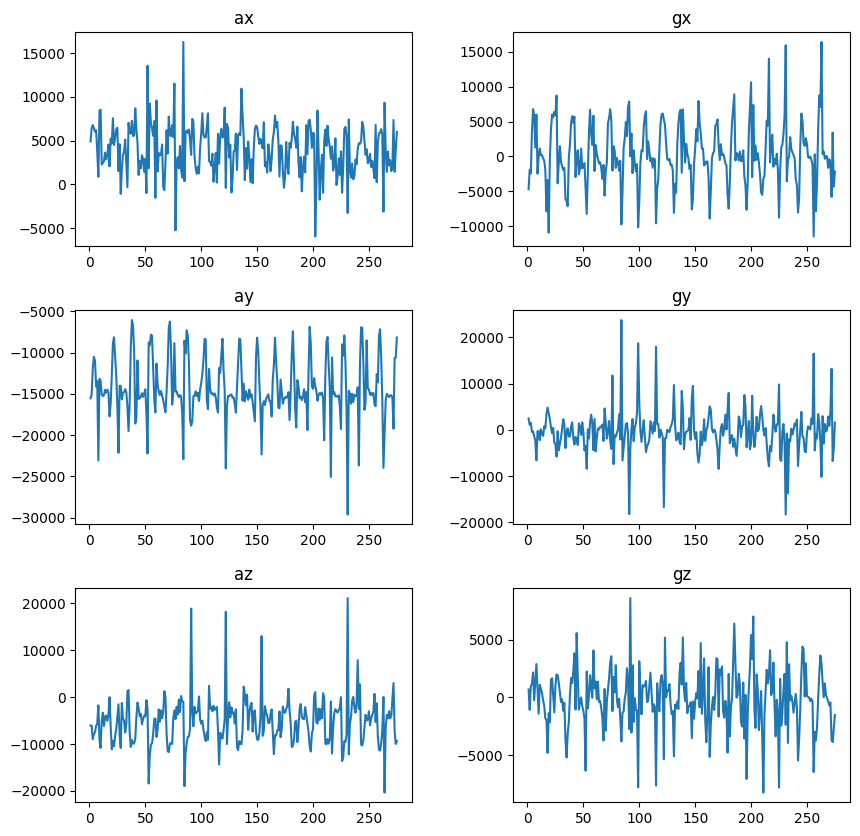

In [19]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3,2)
# 격자 크기 설정
f.set_size_inches((10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)


# [1, 3] 위치 선 그래프
axes[0,0].plot(df2['0'])

axes[0,0].set_title('ax')
# [2, 0] 위치 scatter 그래프(색깔 다르게 2개 겹치기)
axes[1,0].plot(df2['1'])

axes[1,0].set_title('ay')
axes[2,0].plot(df2['2'])

axes[2,0].set_title('az')
axes[0,1].plot(df2['3'])

axes[0,1].set_title('gx')
axes[1,1].plot(df2['4'])

axes[1,1].set_title('gy')
axes[2,1].plot(df2['5'])
axes[1,1].set_title('gy')

axes[2,1].set_title('gz')


plt.show()

<AxesSubplot:>

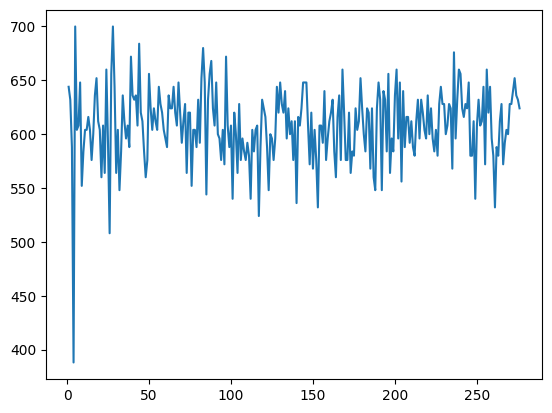

In [29]:
df2['1'].plot()

Text(0.5, 1.0, 'gz')

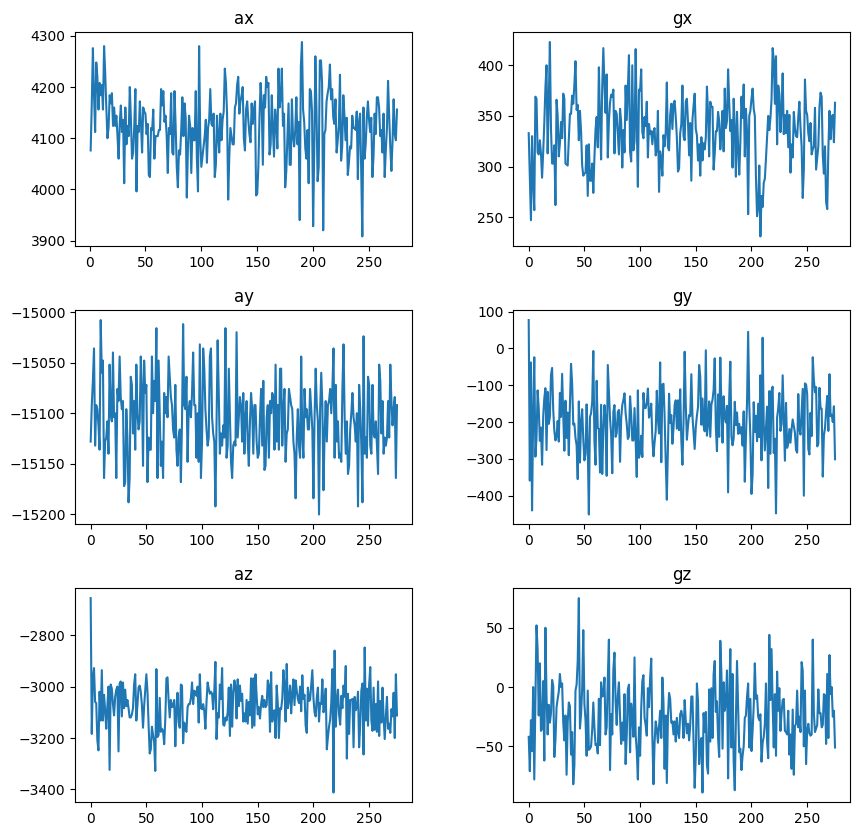

In [15]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3,2)
# 격자 크기 설정
f.set_size_inches((10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)


# [1, 3] 위치 선 그래프
axes[0,0].plot(df1['0'])
axes[0,0].set_title('ax')
# [2, 0] 위치 scatter 그래프(색깔 다르게 2개 겹치기)
axes[1,0].plot(df1['1'])
axes[1,0].set_title('ay')
axes[2,0].plot(df1['2'])
axes[2,0].set_title('az')
axes[0,1].plot(df1['3'])
axes[0,1].set_title('gx')
axes[1,1].plot(df1['4'])
axes[1,1].set_title('gy')
axes[2,1].plot(df1['5'])
axes[2,1].set_title('gz')

Text(0.5, 1.0, 'gz')

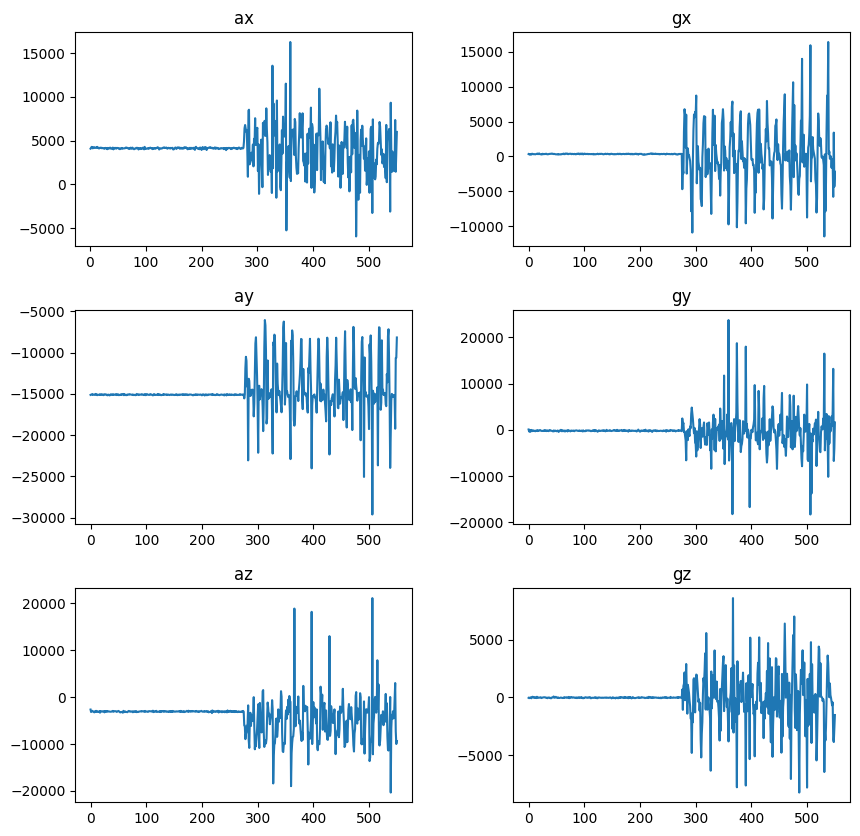

In [21]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3,2)
# 격자 크기 설정
f.set_size_inches((10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
df3 = pd.concat([df1,df2],ignore_index=True)

# [1, 3] 위치 선 그래프
axes[0,0].plot(df3['0'])
axes[0,0].set_title('ax')
# [2, 0] 위치 scatter 그래프(색깔 다르게 2개 겹치기)
axes[1,0].plot(df3['1'])
axes[1,0].set_title('ay')
axes[2,0].plot(df3['2'])
axes[2,0].set_title('az')
axes[0,1].plot(df3['3'])
axes[0,1].set_title('gx')
axes[1,1].plot(df3['4'])
axes[1,1].set_title('gy')
axes[2,1].plot(df3['5'])
axes[2,1].set_title('gz')

In [27]:
df_ddd = pd.read_csv('ddd.csv')


Text(0.5, 1.0, 'gz')

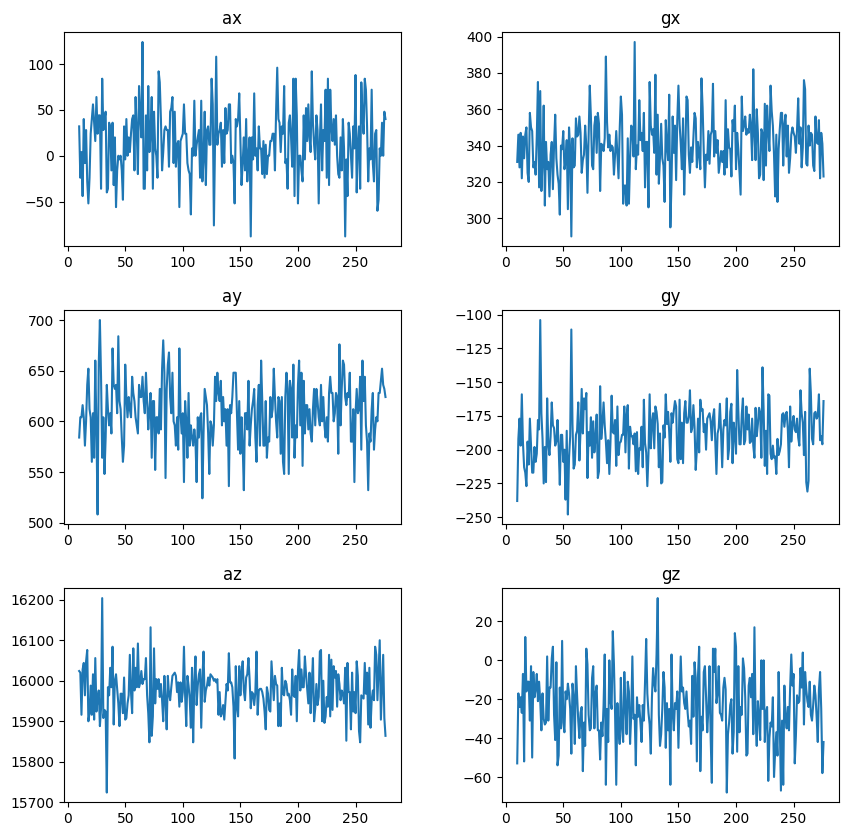

In [28]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3,2)
# 격자 크기 설정
f.set_size_inches((10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

df_ddd = df_ddd.iloc[10:,:]
# [1, 3] 위치 선 그래프
axes[0,0].plot(df_ddd['0'])
axes[0,0].set_title('ax')
# [2, 0] 위치 scatter 그래프(색깔 다르게 2개 겹치기)
axes[1,0].plot(df_ddd['1'])
axes[1,0].set_title('ay')
axes[2,0].plot(df_ddd['2'])
axes[2,0].set_title('az')
axes[0,1].plot(df_ddd['3'])
axes[0,1].set_title('gx')
axes[1,1].plot(df_ddd['4'])
axes[1,1].set_title('gy')
axes[2,1].plot(df_ddd['5'])
axes[2,1].set_title('gz')